# Identifying SRKW Orca Calls using CNN and SNN
## 04-Compare false negatives and positives of CNN vs SNN

Import libraries

In [14]:
import numpy as np
import pandas as pd
import glob
import cv2
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import image


Define directories

In [15]:
parentdir="../"
codedir=parentdir+"code/"
datadir=parentdir+"data/"
train_dir=datadir+"TrainDataLatest_PodCastAllRounds_123567910/"
test_dir=datadir+"TestDataLatest_PodCastAllRounds_123/"
output=parentdir+"output/"
specdir=output+"spectrogram/"
specdir_train=specdir+"train/all/"
specdir_test=specdir+"test/all/"
model_dir = output + 'model/'

Load in false test data annotations

In [16]:
f=os.path.join(test_dir,'test.tsv')
test_table=pd.read_csv(f, sep='\t')
del(f)

In [17]:
test_table.date=np.where(test_table.dataset=='podcast_test_round1', '2019-07-05',
    np.where(test_table.dataset=='podcast_test_round2','2017-09-27', test_table.date))

Load in SNN predictions

In [18]:
f=os.path.join(output,'snn50e_pred10neighbor.csv')
snn_10nn_pred=pd.read_csv(f)
del(f)

In [19]:
snn_10nn_pred=snn_10nn_pred.rename(columns={"pred_correct":"snn_pred_correct"})

Load in false predictions from CNN

In [20]:
f=os.path.join(output,'false_pos.csv')
cnn_fp=pd.read_csv(f)
del(f)
f=os.path.join(output,'false_neg.csv')
cnn_fn=pd.read_csv(f)
del(f)

In [21]:
cnn_pred=pd.concat([cnn_fp,cnn_fn], ignore_index=True)
cnn_pred['spectrogram_filename']=cnn_pred.path.apply(lambda x: x.split('/')[-1])
cnn_pred['cnn_pred_correct']=0
cnn_pred=cnn_pred.rename(columns={"pred":"cnn_pred"})

Merge predictions of SNN and CNN into one table

In [22]:
snn_cnn=pd.merge(snn_10nn_pred, cnn_pred[['spectrogram_filename','cnn_pred','cnn_pred_correct']], on='spectrogram_filename', how='outer')

In [23]:
snn_cnn['cnn_pred_correct']=snn_cnn.cnn_pred_correct.fillna(1)

In [24]:
snn_cnn['wav_filename']=snn_cnn.spectrogram_filename.apply(lambda x: '_'.join(x.split('_')[:-2])+'.wav')
snn_cnn['start_time_s']=snn_cnn.spectrogram_filename.apply(lambda x: x.split('_')[-2])
tmptab=test_table
tmptab['start_time_s']=tmptab.start_time_s.apply(lambda x: str(int(x)))
snn_cnn=pd.merge(snn_cnn, tmptab, how='right', on=['wav_filename', 'start_time_s'])
del(tmptab)

In [25]:
snn_cnn=snn_cnn.drop_duplicates()

In [26]:
pd.crosstab(snn_cnn['snn_pred_correct'], snn_cnn['cnn_pred_correct'])

cnn_pred_correct,0.0,1.0
snn_pred_correct,,
0,5,50
1,19,753


Visualize CNN predictions

In [33]:
cnn1=snn_cnn[(snn_cnn.true_species_id)==1&(snn_cnn.cnn_pred_correct==1)]
cnn2=snn_cnn[(snn_cnn.true_species_id)==1&(snn_cnn.cnn_pred_correct==0)]
cnn3=snn_cnn[(snn_cnn.true_species_id)==0&(snn_cnn.cnn_pred_correct==1)]
cnn4=snn_cnn[(snn_cnn.true_species_id)==0&(snn_cnn.cnn_pred_correct==0)]

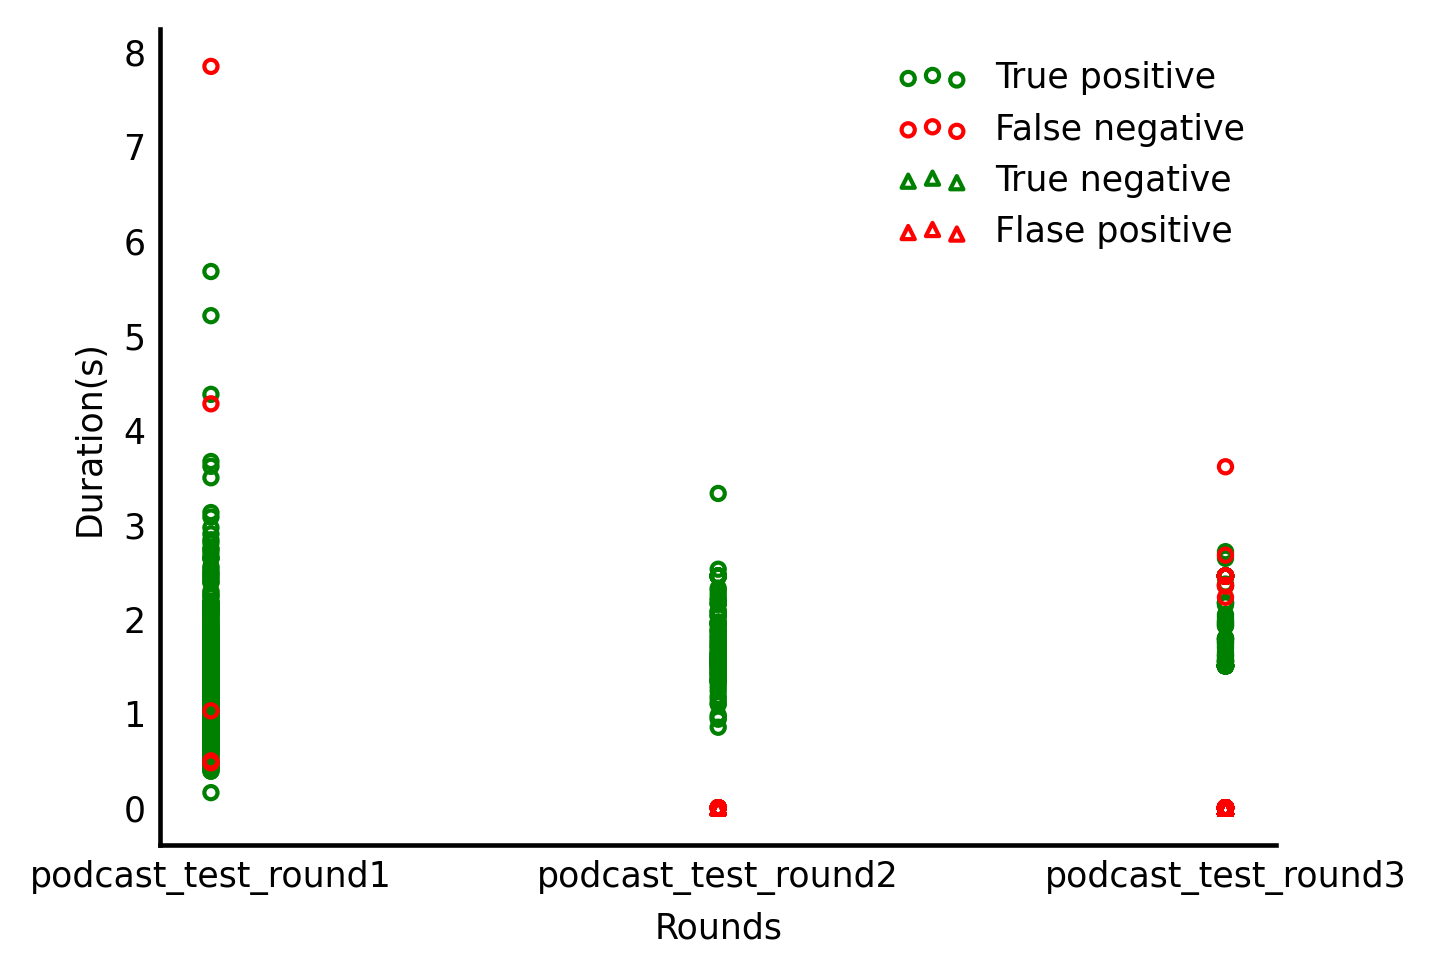

In [42]:
%matplotlib inline 
plt.style.use(os.path.join(codedir,'style/elegant.mplstyle'))
plt.scatter(x=cnn1['dataset'], y=cnn1['duration_s'], s=10, facecolors='none', edgecolors='green', marker='o', label='True positive')
plt.scatter(x=cnn2['dataset'], y=cnn2['duration_s'], s=10, facecolors='none', edgecolors='red', marker='o', label='False negative')
plt.scatter(x=cnn3['dataset'], y=cnn3['duration_s'], s=10, facecolors='none', edgecolors='green', marker='^', label='True negative')
plt.scatter(x=cnn4['dataset'], y=cnn4['duration_s'], s=10, facecolors='none', edgecolors='red', marker='^', label='Flase positive')
plt.xlabel("Rounds")
plt.ylabel("Duration(s)")
plt.legend(loc='upper right')
plt.show()

Visualize SNN predictions

In [ ]:
snn1=snn_cnn[(snn_cnn.true_species_id)==1&(snn_cnn.snn_pred_correct==1)]
snn2=snn_cnn[(snn_cnn.true_species_id)==1&(snn_cnn.snn_pred_correct==0)]
snn3=snn_cnn[(snn_cnn.true_species_id)==0&(snn_cnn.snn_pred_correct==1)]
snn4=snn_cnn[(snn_cnn.true_species_id)==0&(snn_cnn.snn_pred_correct==0)]

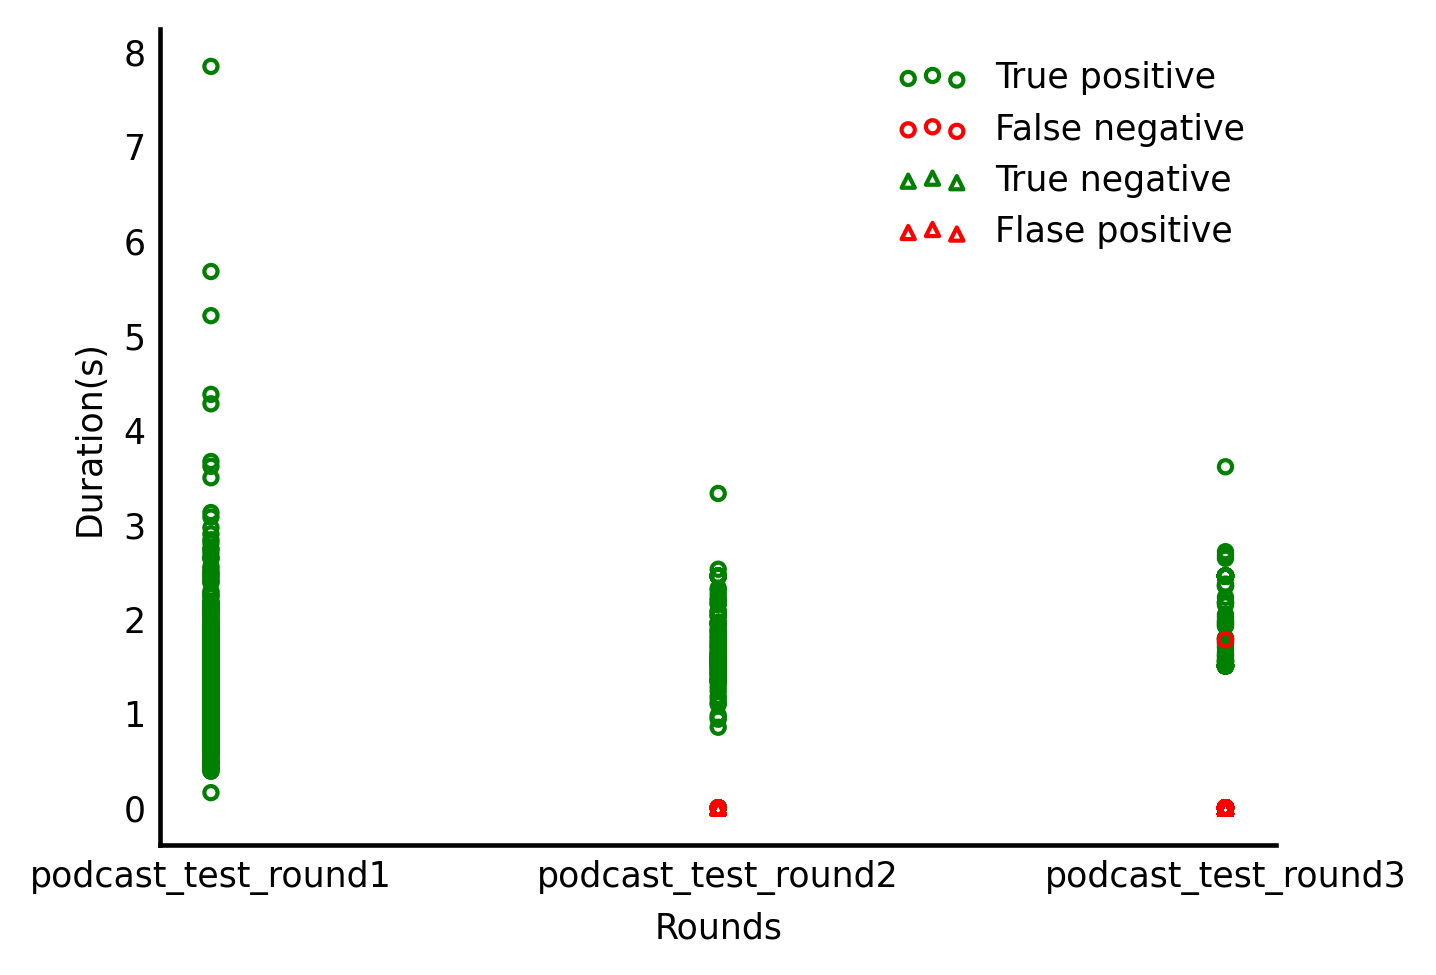

In [54]:
plt.scatter(x=snn1['dataset'], y=snn1['duration_s'], s=10, facecolors='none', edgecolors='green', marker='o', linewidth=1, label='True positive')
plt.scatter(x=snn2['dataset'], y=snn2['duration_s'], s=10, facecolors='none', edgecolors='red', marker='o', linewidth=1, label='False negative')
plt.scatter(x=snn3['dataset'], y=snn3['duration_s'], s=10, facecolors='none', edgecolors='green', marker='^', linewidth=1, label='True negative')
plt.scatter(x=snn4['dataset'], y=snn4['duration_s'], s=10, facecolors='none', edgecolors='red', marker='^', linewidth=1, label='Flase positive')
plt.xlabel("Rounds")
plt.ylabel("Duration(s)")
plt.legend(loc='upper right')
plt.show()

False Predictions by Both Methods

../output/spectrogram/test/all/OS_9_27_2017_10_28_00__0001_0_neg.png


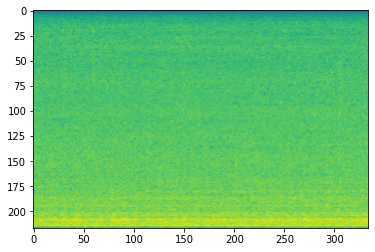

../output/spectrogram/test/all/OS_9_27_2017_11_00_00__0004_0_neg.png


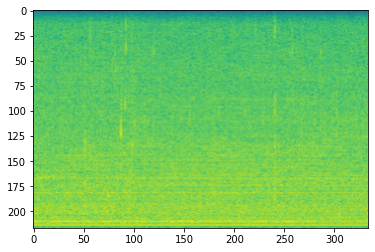

../output/spectrogram/test/all/OS_9_27_2017_11_32_00__0002_0_neg.png


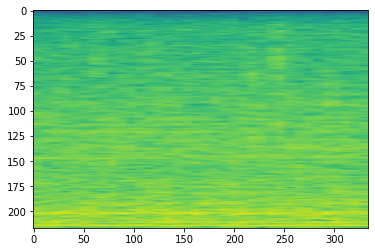

../output/spectrogram/test/all/OS_9_27_2017_11_42_00__0000_0_neg.png


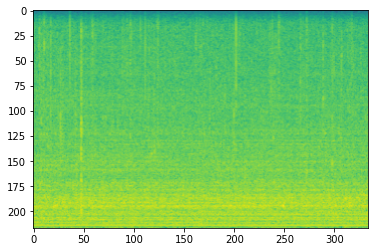

../output/spectrogram/test/all/streaming-orcasound-net_2019_11_14_12_59_00_0_neg.png


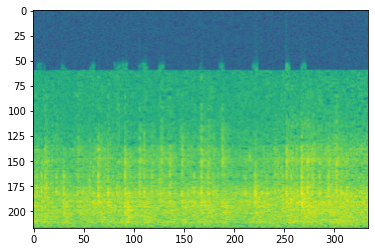

In [12]:
both_wrong=snn_cnn[(snn_cnn.pred_correct==0) & (snn_cnn.cnn_pred_correct==0)]
for f in both_wrong.spectrogram_filename:
    print(specdir_test+f)
    img = mpimg.imread(specdir_test+f)
    imgplot = plt.imshow(img)
    plt.show()
del(f, img, imgplot)

The five samples that are predicted wrong by both models are negative samples. 

In [48]:
pd.crosstab(snn_cnn['true_species_id'], snn_cnn['cnn_pred_correct'])


cnn_pred_correct,0.0,1.0
true_species_id,,
0.0,5,73
1.0,19,730


In [47]:
pd.crosstab(snn_cnn['true_species_id'], snn_cnn['snn_pred_correct'])

snn_pred_correct,0,1
true_species_id,,
0.0,54,24
1.0,1,748


All but one of the wrong predictions made by SNN are negative samples. 